In [1]:
import numpy as np
from hamiltonian import hamiltonian
from super_cell import super_cell
from k_space import k_space
from observables import observables
from observables import z2_wcc
import matplotlib.pyplot as plt
from copy import deepcopy

# Import primitive bulk Hamiltonian

In [2]:
bra_vec   = np.array([[-3.2332500,    0.0000000,    3.2277076],
                      [ 0.0000000,    3.2332500,    3.2277076],
                      [-3.2332500,    3.2332500,    0.0000000]])
spin      = True
basis     = np.array([0,1])
n_elec    = 6
ef        = 3.35382580
inputfile = "../../test_ham/HgTe_Hg_s_Te_p.dat"
Ham_bulk = hamiltonian(inputfile,bra_vec,spin,basis,ef,N_ELEC=n_elec)

Reading Hamiltonian...
Time for reading hr-file:  0.3400909900665283
Hamiltonian from file ../../test_ham/HgTe_Hg_s_Te_p.dat successfully loaded.
H(R) is spin-full and contains 557 R-vectors and 4 orbitals.


Calculating Z_2 invariant for Gamma-plane...
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Jump at pump:5
Z_2=1
Calculating Z_2 invariant for BZ-surface plane...
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
Z_2=0


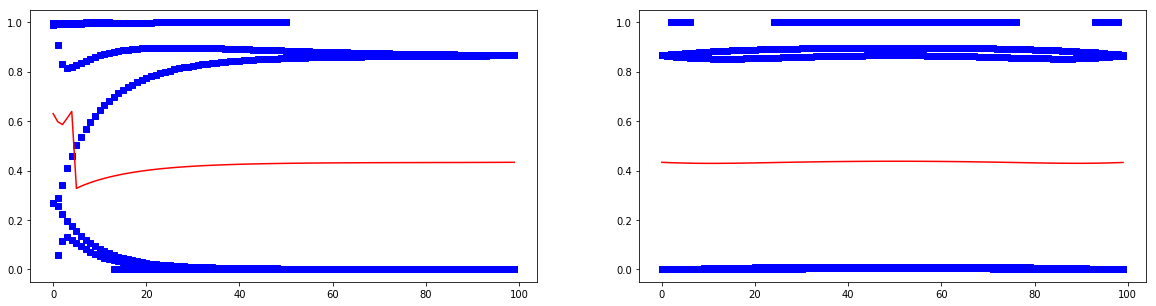

In [3]:
n_pump = np.array([100,50])
normal = 2
z2 = z2_wcc(Ham_bulk,n_pump,normal)
z2.plot_wcc()

# Bulk band structure
## k-path

In [6]:
ktype     = "path"
kbasis    = "red"
vecs      = np.array([[ 0.5, 0.5, 0.5],
                      [ 0.0, 0.0, 0.0],
                      [ 0.5, 0.0, 0.5]])

npoints   = 1000
K_space_bulk = k_space(ktype,kbasis,vecs,Ham_bulk.bra_vec,npoints)

## calculation

In [7]:
op_types = ["S","L"]
op_types_k = ["Orb_SOC_inv","BC"]
observables_bulk = observables(Ham_bulk,K_space_bulk,op_types,op_types_k,PREFIX="bulk_")
#print(observables_bulk.ops["S"].op)
observables_bulk.calculate_ops()
observables_bulk.__dict__.keys()
observables_bulk.ops["S"].__dict__.keys()
#observables_bulk.ops["S"].val

Initializing k-independent operator S.
Initializing k-independent operator L.
Inititalizing k-dependent operator Orb_SOC_inv.
Inititalizing k-dependent operator BC.
Calculating operators on the given k-space...
Diagonalizing all k-points in parallel.
Time for running H(k) FT: 0.07539081573486328
Time for diagonalizing H(k): 0.026606082916259766
Time for calculating expectation value of operator S: 0.026773929595947266
Time for calculating expectation value of operator L: 0.02846813201904297
Time for calculating expectation value of operator Orb_SOC_inv: 0.21719717979431152
Time for calculating expectation value of operator BC: 0.11850619316101074
Shifting eigenvalues w.r.t. Fermi level...
Running post-processing for operator S.
Running post-processing for operator L.
Running post-processing for operator Orb_SOC_inv.
No post-processing.
Running post-processing for operator BC.
Writing eigenvalues output.
Writing output for operator S.
Writing output for operator L.
Writing output for op

dict_keys(['op_type', 'val_k_int', 'post', 'val_b_int', 'ham', 'val', 'op', 'expval', 'f_spec', 'prec'])

In [ ]:
plt.plot(observables_bulk.k_space.k_dist,observables_bulk.evals)
plt.show()

# Calculating the Berry curvature in the Gamma-plane

## k-space

In [ ]:
ktype     = "plane"
kbasis    = "red"
dist = 0.1
vecs      = np.array([[ 0.0, 0.0, 0.0],
                      [dist*(-1.0), 0.0,dist*(-1.0)],
                      [ 0.0, dist*1.0, dist*1.0]])

npoints   = 101
K_space_plane = k_space(ktype,kbasis,vecs,Ham_bulk.bra_vec,npoints)

## Calculation

In [ ]:
op_types = ["S","L"]
op_types_k = ["Orb_SOC_inv","BC"]
observables_bulk = observables(Ham_bulk,K_space_plane,op_types,op_types_k,PREFIX="plane_")
observables_bulk.calculate_ops()

# $Z_2$-invariant, WCC calculation

## Bulk Hamiltonian

## Influence of Semenoff mass

In [ ]:
n_pump = np.array([100,10])
normal = 3
z2_sem = z2_wcc(Ham_bulk_sem,n_pump,normal)
z2_sem.plot_wcc()

## Create super-cell

In [ ]:
sup_vec = np.array([[ 1, 0, 0],
                    [ 1, 2, 0],
                    [ 0, 0, 1]])
Ham_super_cell = super_cell(Ham_bulk,sup_vec)

# Test k-path

In [ ]:
ktype     = "self-defined"
kbasis    = "car"
K_space_sup = k_space(ktype,kbasis,K_space_bulk.k_space_car,Ham_super_cell.bra_vec,npoints)

# Test band structure

In [ ]:
# Initializing observables
op_types = ["S"]
Observables_sup_cell = observables(Ham_super_cell,K_space_sup,op_types,PREFIX="sup_")
Observables_sup_cell.calculate_ops()

# Slab calculation, PBC along $x$

In [ ]:
N_slab = 15
sup_vec = np.array([[ 1, 0, 0],
                    [ 1, 2, 0],
                    [ 0, 0, 1]])
sup_vec[1] *= N_slab
Ham_slab_x = super_cell(Ham_bulk,sup_vec,1)
Ham_slab_x.bra_vec

In [ ]:
ktype     = "path"
kbasis    = "red"
vecs      = np.array([[ -1, 0, 0],
                      [  1, 0, 0]])

npoints   = 500

K_space_slab_x      = k_space(ktype,kbasis,vecs,Ham_slab_x.bra_vec,npoints)

In [ ]:
op_types = ["S"]
op_types_k = ["BC"]
Observables_slab_x = observables(Ham_slab_x,K_space_slab_x,op_types,op_types_k,PREFIX="slab_x_")
Observables_slab_x.calculate_ops()

In [8]:
!pwd

/Users/peck/Work/post_wan/examples/HgTe
